# SNI: 
# https://conacyt.mx/sistema-nacional-de-investigadores/archivo-historico/
CVU', 'NOBILIS', 'NOMBRE DEL INVESTIGADOR(A)', 'CATEGORÍA',
       'ÁREA DEL CONOCIMIENTO', 'DISCIPLINA', 'SUBDISCIPLINA',
       'ESPECIALIDAD', 'INSTITUCIÓN DE ADSCRIPCIÓN', 'DEPENDENCIA ',
       'ENTIDAD FEDERATIVA', 'PAÍS', 'ESTÍMULO ECONÓMICO'], dtype=object

| Variable	| Definition |	Key |
| --- | --- | --- |
| NOBILIS | Sex|	0 = male, 1 = female |
| CATEGORÍA | C = 0, 1 , 2 , 3 | 
| ÁREA DEL CONOCIMIENTO | "I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA"=1 
|                       | "II.- BIOLOGÍA Y QUÍMICA" = 2 |
|                       | "III.- MEDICINA Y CIENCIAS DE LA SALUD" = 3|
|                       | "IV.- HUMANIDADES Y CIENCIAS DE LA CONDUCTA" = 4|
|                       | "V.- CIENCIAS SOCIALES" = 5 |
|                       | "VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS" = 6 |
|                       | "VII.- INGENIERÍAS" = 7 |


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import lux

In [4]:
#https://conacyt.mx/sistema-nacional-de-investigadores/archivo-historico/
mainpath = "../datasets/" #carpeta global
filename = "SNI2021.xlsx" #dataset
fullpath = os.path.join(mainpath, filename)
data = pd.read_excel(fullpath)
data

/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/lux/executor/PandasExecutor.py:257: UserWarning:
Lux detects that the attribute 'CATEGORÍA' maybe contain mixed type.
To visualize this attribute, you may want to convert the 'CATEGORÍA' into a uniform type as follows:
	df['CATEGORÍA'] = df['CATEGORÍA'].astype(str)


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
data.columns.values
#data.shape

array(['CVU', 'NOBILIS', 'NOMBRE DEL INVESTIGADOR(A)', 'CATEGORÍA',
       'ÁREA DEL CONOCIMIENTO', 'DISCIPLINA', 'SUBDISCIPLINA',
       'ESPECIALIDAD', 'INSTITUCIÓN DE ADSCRIPCIÓN', 'DEPENDENCIA ',
       'ENTIDAD FEDERATIVA', 'PAÍS', 'ESTÍMULO ECONÓMICO'], dtype=object)

In [6]:
data["ÁREA DEL CONOCIMIENTO"].values

array(['V.- CIENCIAS SOCIALES', 'V.- CIENCIAS SOCIALES',
       'VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS', ...,
       'V.- CIENCIAS SOCIALES',
       'I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA',
       'II.- BIOLOGÍA Y QUÍMICA'], dtype=object)

In [7]:
data.CATEGORÍA = data.CATEGORÍA.replace({"C": 0})
data.NOBILIS = data.NOBILIS.replace({"DR.":0, "DRA." : 1})
data["ÁREA DEL CONOCIMIENTO"] = data["ÁREA DEL CONOCIMIENTO"].replace({"I.- FÍSICO-MATEMÁTICAS Y CIENCIAS DE LA TIERRA":1, 
"II.- BIOLOGÍA Y QUÍMICA":2,"III.- MEDICINA Y CIENCIAS DE LA SALUD":3, "IV.- HUMANIDADES Y CIENCIAS DE LA CONDUCTA":4,"V.- CIENCIAS SOCIALES":5,"VI.- BIOTECNOLOGÍA Y CIENCIAS AGROPECUARIAS":6,"VII.- INGENIERÍAS":7})
data

/home/isadoji/Storage/Software/miniconda3/envs/py310/lib/python3.10/site-packages/lux/executor/PandasExecutor.py:257: UserWarning:
Lux detects that the attribute 'NOBILIS' maybe contain mixed type.
To visualize this attribute, you may want to convert the 'NOBILIS' into a uniform type as follows:
	df['NOBILIS'] = df['NOBILIS'].astype(str)


Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [8]:
data2 = data[(data["NOBILIS"]==0) | (data["NOBILIS"]==1)]
male = data2[(data2["NOBILIS"]==0)]
maleC = data2[(data2["NOBILIS"]==0) & (data2["CATEGORÍA"]==0) ]
male1 = data2[(data2["NOBILIS"]==0) & (data2["CATEGORÍA"]==1) ]
male2 = data2[(data2["NOBILIS"]==0) & (data2["CATEGORÍA"]==2) ]
male3 = data2[(data2["NOBILIS"]==0) & (data2["CATEGORÍA"]==3) ]
female = data2[(data2["NOBILIS"]==1)]
femaleC = data2[(data2["NOBILIS"]==1) & (data2["CATEGORÍA"]==0) ]
female1 = data2[(data2["NOBILIS"]==1) & (data2["CATEGORÍA"]==1) ]
female2 = data2[(data2["NOBILIS"]==1) & (data2["CATEGORÍA"]==2) ]
female3 = data2[(data2["NOBILIS"]==1) & (data2["CATEGORÍA"]==3) ]
print("Hombre=",male.shape[0],":C =",maleC.shape[0],",1 =",male1.shape[0],",2 =",male2.shape[0],",3 =",male3.shape[0])
print("Mujer =",female.shape[0],":C =",femaleC.shape[0],",1 =",female1.shape[0],",2 =",female2.shape[0],",3 =",female3.shape[0])


Hombre= 21145 :C = 4948 ,1 = 11033 ,2 = 3199 ,3 = 1965
Mujer = 13017 :C = 4047 ,1 = 6721 ,2 = 1608 ,3 = 641


(array([1174.,    0.,    0., 2275.,    0.,    0., 1620.,    0.,    0.,
           0., 2509.,    0.,    0., 2500.,    0.,    0., 1802.,    0.,
           0., 1137.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. , 4.3, 4.6,
        4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <BarContainer object of 20 artists>)

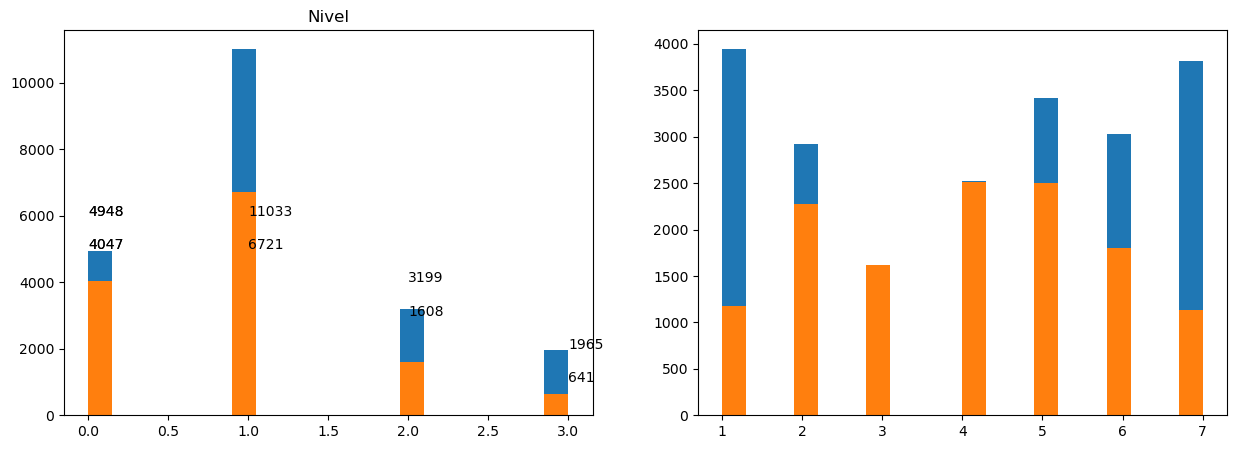

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(male["CATEGORÍA"],bins=20,label='hombres')
plt.hist(female["CATEGORÍA"],bins=20,label='mujeres')
plt.text(0.0,6000,len(maleC["CATEGORÍA"]))
plt.text(0.0,5000,len(femaleC["CATEGORÍA"]))
plt.text(0.0,6000,len(maleC["CATEGORÍA"]))
plt.text(0.0,5000,len(femaleC["CATEGORÍA"]))
plt.text(1.0,6000,len(male1["CATEGORÍA"]))
plt.text(1.0,5000,len(female1["CATEGORÍA"]))
plt.text(2.0,4000,len(male2["CATEGORÍA"]))
plt.text(2.0,3000,len(female2["CATEGORÍA"]))
plt.text(3.0,2000,len(male3["CATEGORÍA"]))
plt.text(3.0,1000,len(female3["CATEGORÍA"]))
plt.title("Nivel")
plt.subplot(1,2,2)
plt.hist(male["ÁREA DEL CONOCIMIENTO"],bins=20,label='hombres')
plt.hist(female["ÁREA DEL CONOCIMIENTO"],bins=20,label='mujeres')